In [3]:
#loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report

In [5]:
#read the data
train = pd.read_csv('E:/python/SMS_train.csv',encoding = 'unicode_escape')

In [6]:
#shape 
train.shape

(957, 3)

In [7]:
#look at the data
train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


* replacing Non-Spam = 0 , Spam = 1

In [8]:
train.Label = train.Label.replace( ['Non-Spam' , 'Spam'] , [0,1])

In [9]:
train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


### Histogram of number of string words in message_body

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


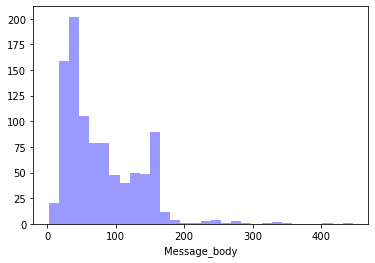

In [10]:
len_train = train.Message_body.str.len()
sns.distplot(len_train ,kde= False, bins  = 30 ,color= 'b')
plt.show()

### Word-cloud on Raw Text

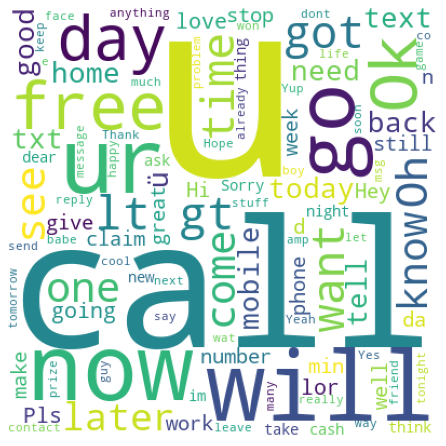

In [11]:
all_words  = ' '.join([text for text in train.Message_body])

wordcloud  = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

* We can see {ur , ok, will , it , yup etc} noise stopwords

### Text Pre-Processing

In [12]:
ps = WordNetLemmatizer()            
corpus = []
for i in range(0, len(train)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', train['Message_body'][i])   ###removing numbers and speical characters
    review = review.lower()

    review = review.split()

    #lemmatization
    
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')]    #stopwords removal
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
corpus

['rofl true name',
 'guy bitching acted like interested buying something else next week gave u free',
 'pity mood suggestion',
 'b going esplanade fr home',
 'nd time tried contact u u pound prize claim easy call p per minute bt national rate',
 'reminder get pound free call credit detail great offer pls reply text valid name house postcode',
 'huh lei',
 'wait til least wednesday see get',
 'ard like dat lor',
 'ok lor sony ericsson salesman ask shuhui say quite gd use considering',
 'get dump heap mom decided come lowes boring',
 'anything lor juz u lor',
 'next lt gt hour imma flip shit',
 'sorry call later',
 'meant calculation lt gt unit lt gt school really expensive started practicing accent important decided year dental school nmde exam',
 'yes u texted pshew missing much',
 'yeh indian nice tho kane bit shud go drink sometime soon mite hav go da work laugh soon love pete x x',
 'well keep mind got enough gas one round trip barring sudden influx cash',
 'hahaha use brain dear',


In [14]:
train['clean_Message'] = corpus

In [15]:
# removing all words having length is less than 3
train.clean_Message = train.clean_Message.apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [16]:
#look at the comparison between raw and cleaned data
train.head()

,S. No.,Message_body,Label,clean_Message
0,1,Rofl. Its true to its name,0,rofl true name
1,2,The guy did some bitching but I acted like i'd...,0,bitching acted like interested buying somethin...
2,3,"Pity, * was in mood for that. So...any other s...",0,pity mood suggestion
3,4,Will ü b going to esplanade fr home?,0,going esplanade home
4,5,This is the 2nd time we have tried 2 contact u...,1,time tried contact pound prize claim easy call...


### word-cloud after removing noise

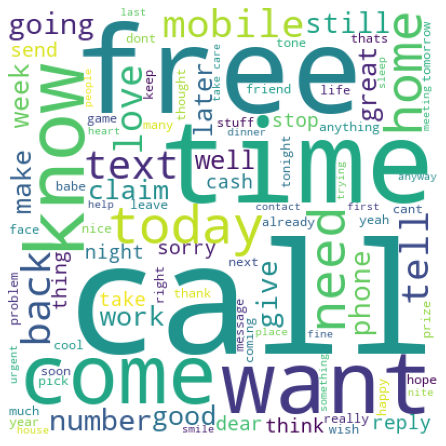

In [17]:
clean_words  = ' '.join([text for text in train.clean_Message])

wordcloud  = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(clean_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## CountVectorizer

In [18]:
vectorizer = CountVectorizer(max_features= 1000 , stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()
y = train.Label

### train-test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = train.Label ,test_size=0.15, random_state= 23)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((813, 1000), (144, 1000), (813,), (144,))

## Model Building
### Random Forest

In [20]:
#model fitting

classifier = RandomForestClassifier(max_features= 'sqrt',random_state = 21)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_features='sqrt', random_state=21)

In [21]:
#prediction
y_pred = classifier.predict(X_test)

In [22]:
#accuracy
print(accuracy_score(y_test, y_pred)*100)

95.13888888888889


In [25]:
#confusion matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
Label,,
0,126,0
1,7,11


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       126
           1       1.00      0.61      0.76        18

    accuracy                           0.95       144
   macro avg       0.97      0.81      0.87       144
weighted avg       0.95      0.95      0.95       144



### prediction on SMS_test.csv

In [28]:
#load the data
test = pd.read_csv('E:/python/SMS_test.csv')

In [29]:
#head
test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",NaN
1,2,"Loan for any purpose �500 - �75,000. Homeowner...",NaN
2,3,Congrats! Nokia 3650 video camera phone is you...,NaN
3,4,URGENT! Your Mobile number has been awarded wi...,NaN
4,5,Someone has contacted our dating service and e...,NaN


In [30]:
#data pre-processing
test = test.set_index('S. No.')
test.drop('Label', axis = 1, inplace =True)

In [35]:
test.head()

,Message_body
S. No.,
1,"UpgrdCentre Orange customer, you may now claim..."
2,"Loan for any purpose �500 - �75,000. Homeowner..."
3,Congrats! Nokia 3650 video camera phone is you...
4,URGENT! Your Mobile number has been awarded wi...
5,Someone has contacted our dating service and e...


In [32]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(test.Message_body).toarray()


In [33]:
#prediction
test_pred = classifier.predict(X)

## Label prediction

In [34]:
print(test.Message_body[0:10])
print(test_pred[0:10])


S. No.
1     UpgrdCentre Orange customer, you may now claim...
2     Loan for any purpose �500 - �75,000. Homeowner...
3     Congrats! Nokia 3650 video camera phone is you...
4     URGENT! Your Mobile number has been awarded wi...
5     Someone has contacted our dating service and e...
6     Send a logo 2 ur lover - 2 names joined by a h...
7     FREE entry into our �250 weekly competition ju...
8     100 dating service cal;l 09064012103 box334sk38ch
9     FREE RINGTONE text FIRST to 87131 for a poly o...
10    4mths half price Orange line rental & latest c...
Name: Message_body, dtype: object
[0 0 0 0 0 0 0 0 0 0]


#### 0 : Non-Spam & 1 : Spam